<a href="https://colab.research.google.com/github/SiracencoSerghei/linear_algebra/blob/main/3.2_SVD/3.2_7_condition_num.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
from mpl_toolkits.mplot3d import Axes3D

---
# Condition number of a matrix
---

12.036803082063361 0.0028371982581708644


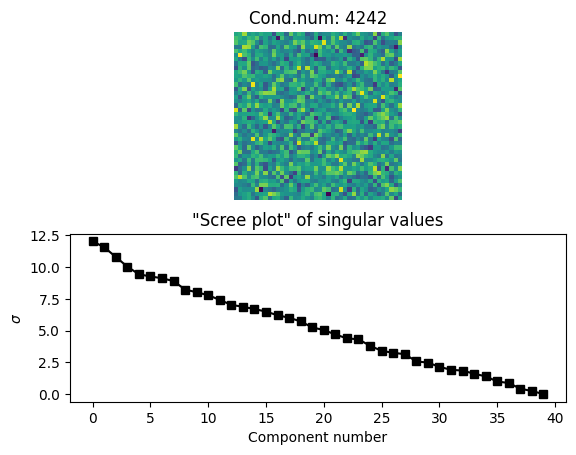

In [12]:
# matrix sizes
m = 40
n = 30
# define a 2D Gaussian for smoothing
k = int( (m+n)/4 )
xx = np.linspace(-3,3,k)
[X,Y] = np.meshgrid(xx,xx)
g2d = np.exp(-(X**2 + Y**2) / (k/8))

# matrix
A = np.random.randn(m,m)
# A = scipy.signal.convolve2d(A,g2d,'same')



# SVD
S = np.linalg.svd(A)[1]

# compute condition number
condnum = S[0]/S[-1]
print(S[0],S[-1])

# show the matrix
plt.subplot(211)
plt.imshow(A)
plt.axis('off')
plt.title('Cond.num: %d' %condnum)

plt.subplot(212)
plt.plot(S,'ks-')
plt.xlabel('Component number')
plt.ylabel('$\sigma$')
plt.title('"Scree plot" of singular values')

plt.show()

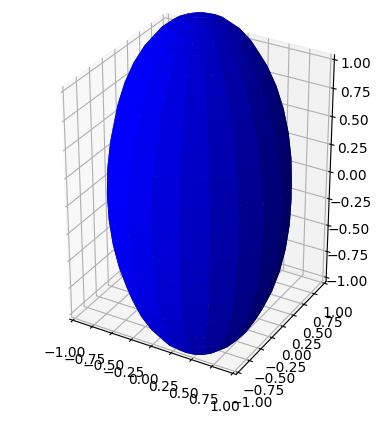

In [17]:
## sphere

# the transformation matrix T

#variant_1:
# T = np.eye(3)

#variant_2:
# T[-1,-1] = .5

#variant_3:
T[-1,-1] = 1.5


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Make data
n = 21
u = np.linspace(0, 2*np.pi,n)
v = np.linspace(0, np.pi,n)
x = np.outer(np.cos(u), np.sin(v))
y = np.outer(np.sin(u), np.sin(v))
z = np.outer(np.ones(np.size(u)), np.cos(v))

# put coords in a matrix to be transformed
M = np.concatenate( (np.reshape(x,(n*n,1)),np.reshape(y,(n*n,1)),np.reshape(z,(n*n,1))) ,axis=1)

# apply the transformation matrix to the coordinates
TM = T@M.T

# get out the new coordinates
xp = np.reshape(TM[0,:],(n,n))
yp = np.reshape(TM[1,:],(n,n))
zp = np.reshape(TM[2,:],(n,n))

# Plot the surface
ax.plot_surface(xp,yp,zp, color='b')
ax.axis('square')
ax.set_xlim3d(-1,1)
ax.set_ylim3d(-1,1)
ax.set_zlim3d(-1,1)

plt.show()

---
# Code Challenge: Create matrix with desired condition number
---

In [18]:
# Create a random matrix with a specified condition number

m = 6
n = 16
cond_num = 41.99

# create singular vectors matricies
U,junk = np.linalg.qr( np.random.randn(m,m) )
V,junk = np.linalg.qr( np.random.randn(n,n) )

s = np.linspace(cond_num,1,np.min([m,n]))
S = np.zeros((m,n))
for i in range(len(s)):
  S[i,i] = s[i]

# create A
A = U@S@V.T
cond_num = np.linalg.cond(A)
print(cond_num)

41.99000000000004


<ipython-input-21-31708c5926d3>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(231)


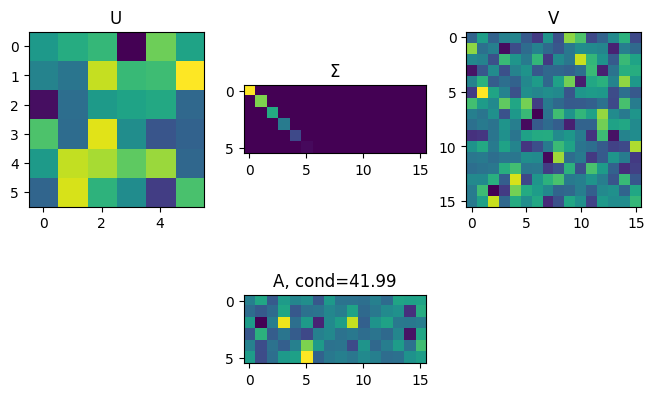

In [21]:
# plotting

fig = plt.subplots(1,figsize=(8,5))

plt.subplot(231)
plt.imshow(U)
plt.title('U')

plt.subplot(232)
plt.imshow(S)
plt.title('$\Sigma$')

plt.subplot(233)
plt.imshow(V)
plt.title('V')

plt.subplot(235)
plt.imshow(A)
plt.title('A, cond=%g'%cond_num)

plt.show()